In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.73286148, -0.61273451, -0.92219565,  1.22408489,  1.25278712,
         0.3491144 ,  0.1613324 , -0.33172622,  0.90021655, -0.48842651],
       [-0.84806377, -0.60956753, -1.09063052,  1.11030452,  1.14057794,
         0.09278086, -0.32366942,  0.30014916,  0.16229184,  0.72052859]])

In [4]:
test_Features[:2]

array([[-0.05427174, -0.33709309,  0.22997505, -0.1177576 ,  0.0863546 ,
        -0.75581334,  0.58046402, -0.21429151, -0.90238923,  1.17873923],
       [-0.81585934, -0.47107091, -0.89638026,  1.89199752,  1.450963  ,
         0.45876821, -0.41844032,  0.45654312,  0.24363902, -0.91433412]])

In [5]:
train_Label[:4]

array([1, 0, 1, 0])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([1, 1, 0, 0])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=30*4,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=30*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=30*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120)               1320      
_________________________________________________________________
dense_2 (Dense)              (None, 90)                10890     
_________________________________________________________________
dense_3 (Dense)              (None, 60)                5460      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 19,531
Trainable params: 19,531
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [17]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 2s - loss: 0.6746 - acc: 0.6837 - val_loss: 0.5910 - val_acc: 0.7694
Epoch 2/30
 - 0s - loss: 0.4531 - acc: 0.8015 - val_loss: 0.4218 - val_acc: 0.8049
Epoch 3/30
 - 0s - loss: 0.3900 - acc: 0.8270 - val_loss: 0.4029 - val_acc: 0.8200
Epoch 4/30
 - 0s - loss: 0.3695 - acc: 0.8414 - val_loss: 0.3815 - val_acc: 0.8410
Epoch 5/30
 - 0s - loss: 0.3582 - acc: 0.8505 - val_loss: 0.3659 - val_acc: 0.8456
Epoch 6/30
 - 0s - loss: 0.3496 - acc: 0.8565 - val_loss: 0.3652 - val_acc: 0.8535
Epoch 7/30
 - 0s - loss: 0.3447 - acc: 0.8576 - val_loss: 0.3546 - val_acc: 0.8509
Epoch 8/30
 - 0s - loss: 0.3418 - acc: 0.8595 - val_loss: 0.3541 - val_acc: 0.8528
Epoch 9/30
 - 0s - loss: 0.3320 - acc: 0.8651 - val_loss: 0.3561 - val_acc: 0.8555
Epoch 10/30
 - 0s - loss: 0.3306 - acc: 0.8664 - val_loss: 0.3479 - val_acc: 0.8535
Epoch 11/30
 - 0s - loss: 0.3250 - acc: 0.8666 - val_loss: 0.3491 - val_acc: 0.8548
Epoch 12/30
 - 0s - loss: 0.3230 - a

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

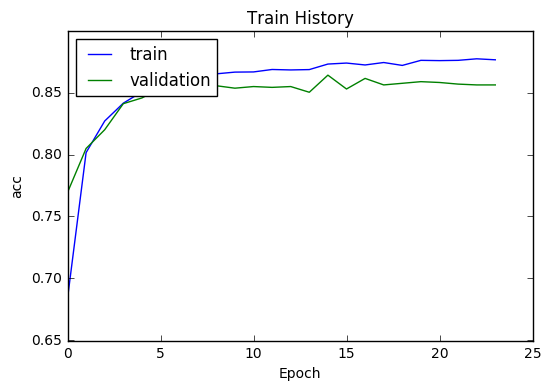

In [19]:
show_train_history(train_history,'acc','val_acc')

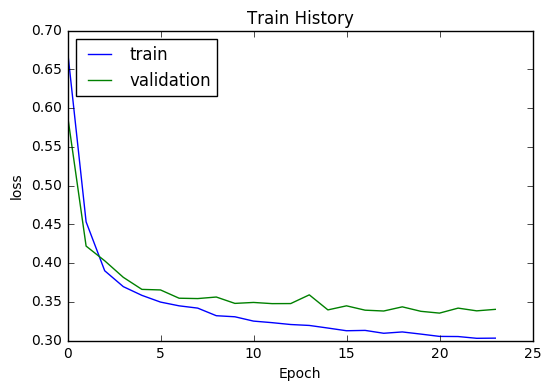

In [20]:
show_train_history(train_history,'loss','val_loss')

In [21]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 114us/step


In [22]:
scores[1]

0.8717139854666813